# Querying and Plotting the Lasair Database (PyroSQL/Matplotlib/Plotly)


In [139]:
import pyrosql
import settings

# Setup Connection to Lasair Database

In [140]:
psql = pyrosql.PyroSQL(settings.DB_HOST, settings.DB_USER, settings.DB_PASS, "3306", "MySQL")

# Run query to get a few candidates

In [141]:
table = psql.execute_sql_query("select *, decl as 'DEC' from candidates limit 1000", "ztf")

# Get number of rows returned

In [143]:
table.count()

1000

# Get results table as Astropy.Table

In [144]:
astropy_table = table.as_astropy()

# Show astropy (interactive) table in notebook 

In [145]:
astropy_table.show_in_notebook()

# Plotting an interactive Scatter plot using matplotlib

<IPython.core.display.Javascript object>


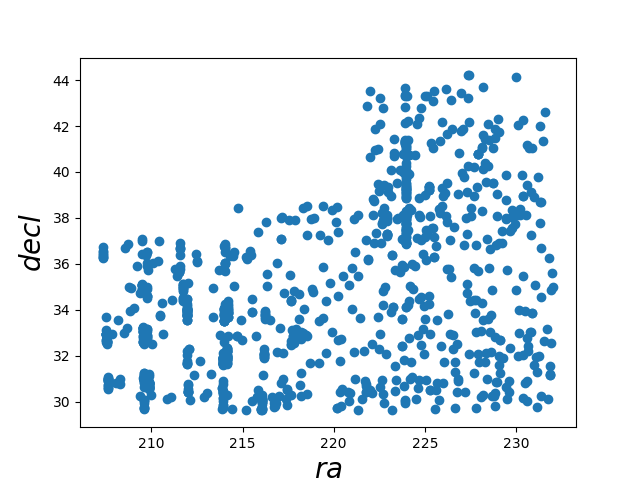

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [146]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = astropy_table["ra"]
y = astropy_table["decl"]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.scatter(x, y)

plt.xlabel("$ra$", fontsize=20)
plt.ylabel("$decl$", fontsize=20)

def update(w = 1.0):
    fig.canvas.draw()

interact(update);

# Plotting a Histogram using matplotlib

<IPython.core.display.Javascript object>


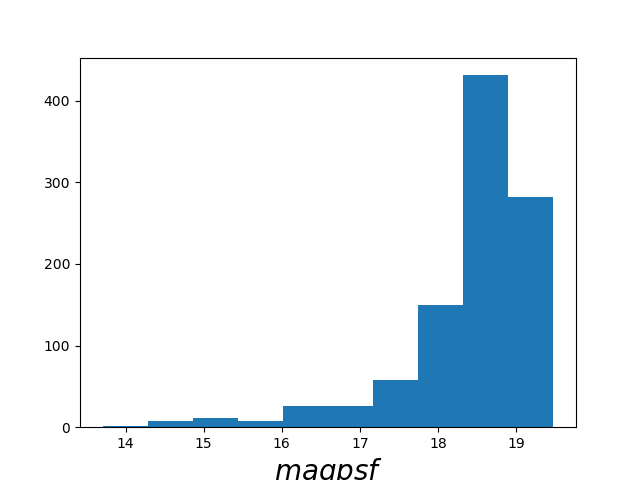

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [147]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = astropy_table["magpsf"]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.hist(x, bins=10)
plt.xlabel("$magpsf$", fontsize=20)

def update(w = 1.0):
    fig.canvas.draw()

interact(update);


# Creating plots using plotly

In [148]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go

import numpy as np

init_notebook_mode() # Important


# Plotting a Heat Map

In [149]:

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([go.Histogram2dContour(x=astropy_table["jd"], y=astropy_table["ra"], contours=dict(coloring='heatmap')),
       go.Scatter(x=astropy_table["jd"], y=astropy_table["ra"], mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

# Scatter Plot for Large Datasets

In [150]:
#Large Datasets

N = 100000
trace = go.Scattergl(
    x = astropy_table["ra"],
    y = astropy_table["decl"],
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
data = [trace]
iplot(data, filename='compare_webgl')

# 3D Scatter plot

In [151]:
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=astropy_table["ra"],
    y=astropy_table["decl"],
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

# Plot with Dynamic Slider

In [ ]:
data = [dict(
        visible = False,
        line=dict(color='00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = astropy_table["elong"],
        y = np.sin(step*astropy_table["elong"])) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []

for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)

fig = dict(data=data, layout=layout)

iplot(fig, filename='Sine Wave Slider')


# Plot objects on iPyAladin

In [72]:
import ipyaladin.aladin_widget as ipyal

In [73]:
aladin= ipyal.Aladin()
aladin

Aladin(options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'reticle_color', 'reticle_size…

AttributeError: 'bool' object has no attribute 'error'

AttributeError: 'bool' object has no attribute 'error'

AttributeError: 'bool' object has no attribute 'error'

AttributeError: 'bool' object has no attribute 'error'

AttributeError: 'bool' object has no attribute 'error'

AttributeError: 'bool' object has no attribute 'error'

AttributeError: 'bool' object has no attribute 'error'

In [ ]:
aladin.add_table(astropy_table)
